In [15]:
! python -V

Python 3.6.11


In [29]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
%precision 3

import lale
from lale.lib.lale import Hyperopt
from lale.operators import make_pipeline
from lale.lib.lale import NoOp, ConcatFeatures

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

lale.wrap_imported_operators()

In [30]:
df = pd.read_csv('../Data/train.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df['Month'] = df['datetime'].dt.month
df['Day'] = df['datetime'].dt.day
df = df.drop('datetime', axis=1)
df.replace(-1, pd.np.nan, inplace=True)
df = df.interpolate(axis=1)
print(df.head(10))
y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

y  client  close  price_am  price_pm  Month   Day
0  17.0     0.0    0.0  2.333333  4.666667    7.0   1.0
1  18.0     0.0    0.0  2.333333  4.666667    7.0   2.0
2  20.0     0.0    0.0  2.333333  4.666667    7.0   3.0
3  20.0     0.0    0.0  2.333333  4.666667    7.0   4.0
4  14.0     0.0    0.0  2.333333  4.666667    7.0   5.0
5  14.0     0.0    0.0  2.333333  4.666667    7.0   6.0
6   4.0     0.0    0.0  2.333333  4.666667    7.0   7.0
7  10.0     0.0    0.0  2.333333  4.666667    7.0   8.0
8  12.0     0.0    0.0  2.333333  4.666667    7.0   9.0
9  21.0     0.0    0.0  2.333333  4.666667    7.0  10.0


In [31]:
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
sscaler.fit(X)
X = sscaler.transform(X)
mmscaler = preprocessing.MinMaxScaler() # インスタンスの作成
mmscaler.fit(X)           # xの最大・最小を計算
X = mmscaler.transform(X) # xを変換

In [32]:
df_ = pd.read_csv('../Data/test.csv')
df_.head(10)
df_['datetime'] = pd.to_datetime(df_['datetime'])
df_['Month'] = df_['datetime'].dt.month
df_['Day'] = df_['datetime'].dt.day
df_date = df_['datetime']
df_ = df_.drop('datetime', axis=1)
df_.replace(-1, pd.np.nan, inplace=True)
df_ = df_.interpolate(axis=1)
X_ = df_.iloc[:, :].values
sscaler.fit(X_)
X_ = sscaler.transform(X_)
mmscaler.fit(X_)           # xの最大・最小を計算
X_ = mmscaler.transform(X_) # xを変換

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
# X_train = X
# y_train = y

In [34]:
# create pipeline(PCA → Tree)
pipeline = (PCA | NoOp) >> DecisionTreeClassifier

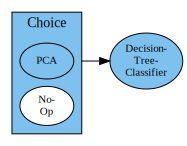

In [14]:
pipeline.visualize()

In [52]:
# create pipeline(PCA and raw data → Tree)
pipeline = (
                (PCA & NoOp)
                 >> ConcatFeatures
                 >> AdaBoostRegressor
            )

In [53]:
model = pipeline.auto_configure(
                                    X_train, y_train,
                                    optimizer=lale.lib.lale.GridSearchCV,
                                )

AssertionError: 

In [25]:
model.pretty_print(ipython_display=True, show_imports=False)

```python
pca = PCA(svd_solver="full", whiten=True)
decision_tree_classifier = DecisionTreeClassifier(
    max_depth=4,
    max_features=None,
    min_samples_leaf=0.15972362551988367,
    min_samples_split=0.04383515702806606,
)
pipeline = (pca & NoOp()) >> ConcatFeatures() >> decision_tree_classifier
```

In [26]:
y_pred = model.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

         0.0       0.06      0.88      0.12         8
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         3
         7.0       0.00      0.00      0.00         6
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00         4
        10.0       0.00      0.00      0.00         5
        11.0       0.00      0.00      0.00         7
        12.0       0.00      0.00      0.00        10
        13.0       0.00      0.00      0.00        14
        14.0       0.00      0.00      0.00        17
        15.0       0.04      0.33      0.07        12
        16.0       0.00      0.00      0.00         9
        17.0       0.00      0.00      0.00        11
        18.0       0.00      0.00      0.00        17
        19.0       0.00      0.00      0.00        13
        20.0       0.00      0.00      0.

In [28]:
print("score:", accuracy_score(y_test, y_pred))

score: 0.04120443740095087
